In [1]:
from bs4 import BeautifulSoup
import json
import requests
import pandas as pd

In [3]:
symtoms = ['dizziness','shortness-of-breath']
url = 'https://www.healthline.com/symptom/' + '/'.join(symtoms)
print(url)

https://www.healthline.com/symptom/dizziness/shortness-of-breath


In [6]:
resp = requests.get(url, timeout=15)
resp

<Response [200]>

In [9]:
p=resp.content
p

b'<!DOCTYPE html><html lang="en"><head>\n<link rel="preload" href="https://d3otfkap419ijo.cloudfront.net/_next/40d3454b-deb1-47c8-ac7f-5f3d1d9dbd0a/pages/symptom.js" as="script">\n<link rel="preload" href="https://d3otfkap419ijo.cloudfront.net/_next/40d3454b-deb1-47c8-ac7f-5f3d1d9dbd0a/app.js" as=\'script\' >\n<meta charSet="utf-8" class="next-head" data-reactroot=""/><title class="next-head" data-reactroot="">Dizziness, Shortness of breath: 34 Possible Causes</title><link rel="canonical" href="https://www.healthline.com/symptom/dizziness" class="next-head" data-reactroot=""/><meta content="heartattack,cardiovascular" name="sailthru.tags" class="next-head" data-reactroot=""/><meta content="2805580" name="imuid" class="next-head" data-reactroot=""/><meta content="heartattack" name="k1" class="next-head" data-reactroot=""/><meta content="cardiovascular" name="k2" class="next-head" data-reactroot=""/><meta content="Discover 34 possible causes for dizziness, shortness of breath including H

In [17]:
psd = BeautifulSoup(p, "html.parser")
print(psd.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link as="script" href="https://d3otfkap419ijo.cloudfront.net/_next/40d3454b-deb1-47c8-ac7f-5f3d1d9dbd0a/pages/symptom.js" rel="preload"/>
  <link as="script" href="https://d3otfkap419ijo.cloudfront.net/_next/40d3454b-deb1-47c8-ac7f-5f3d1d9dbd0a/app.js" rel="preload"/>
  <meta charset="utf-8" class="next-head" data-reactroot=""/>
  <title class="next-head" data-reactroot="">
   Dizziness, Shortness of breath: 34 Possible Causes
  </title>
  <link class="next-head" data-reactroot="" href="https://www.healthline.com/symptom/dizziness" rel="canonical">
   <meta class="next-head" content="heartattack,cardiovascular" data-reactroot="" name="sailthru.tags"/>
   <meta class="next-head" content="2805580" data-reactroot="" name="imuid"/>
   <meta class="next-head" content="heartattack" data-reactroot="" name="k1"/>
   <meta class="next-head" content="cardiovascular" data-reactroot="" name="k2"/>
   <meta class="next-head" content="Discover 34 possible 

In [35]:
# symptons of dizziness, debug 1 li elem first
lis=psd.find_all("li", attrs='css-ee6cf6')
syms=[ li.find('h2').text for li in lis]

# Note: h2 titles.... story not finish. we need to parse links rather than h2 text.
# Q: "34 possible conditions" is lying.. where this number come from, should be 20 ? since 20 li element returned.
print(len(syms))
syms

20


['Heart Attack',
 'What Causes Abnormal Heart Rhythms?',
 'Panic Disorder',
 'What Is Hyperventilation?',
 'Everything You Need to Know About High Blood Pressure (Hypertension)',
 'Cold and Flu',
 'Bleeding',
 'Beriberi',
 'Hypovolemic Shock',
 'Hypothermia',
 'Ventricular Tachycardia',
 'Caffeine Overdose: How Much Is Too Much?',
 'Pulmonary Embolism',
 'Paroxysmal Supraventricular Tachycardia (PSVT)',
 'Atrial Flutter',
 'Epidural Hematoma',
 'Atrial Fibrillation and Flutter',
 'Cardiac Tamponade',
 'Hypertrophic Cardiomyopathy',
 'Multifocal Atrial Tachycardia and Your Heart']

In [59]:
# index 8 strip out prefix
# e.g.:
# <a class="css-1atv2b5" href="/health/abnormal-heart-rhythms"><div class="h1 css-yss54f egb32mv0" role="presentation">2</div><h2 class="h1 css-kjyn3a egb32mv1">What Causes Abnormal Heart Rhythms?</h2></a>
conditions=[li.a['href'][8:] for li in lis]
len(conditions)

20

In [60]:
conditions

['heart-attack',
 'abnormal-heart-rhythms',
 'panic-disorder',
 'hyperventilation',
 'high-blood-pressure-hypertension',
 'cold-flu',
 'bleeding',
 'beriberi',
 'hypovolemic-shock',
 'hypothermia',
 'ventricular-tachycardia',
 'caffeine-overdose',
 'pulmonary-embolus',
 'paroxysmal-supraventricular-tachycardia-psvt',
 'heart-disease/atrial-flutter',
 'epidural-hematoma',
 'atrial-fibrillation-and-flutter',
 'cardiac-tamponade',
 'hypertrophic-cardiomyopathy',
 'multifocal-atrial-tachycardia']

## Part 1: singular causes

e.g. What Causes Dizziness?
https://www.healthline.com/symptom/dizziness

has list of 84 conditions (disease)

In [61]:
url = 'https://www.healthline.com/symptom/dizziness'
resp = requests.get(url, timeout=15)
single = BeautifulSoup(resp.content, "html.parser")
print(single.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link as="script" href="https://d3otfkap419ijo.cloudfront.net/_next/40d3454b-deb1-47c8-ac7f-5f3d1d9dbd0a/pages/symptom.js" rel="preload"/>
  <link as="script" href="https://d3otfkap419ijo.cloudfront.net/_next/40d3454b-deb1-47c8-ac7f-5f3d1d9dbd0a/app.js" rel="preload"/>
  <meta charset="utf-8" class="next-head" data-reactroot=""/>
  <title class="next-head" data-reactroot="">
   Dizziness: Causes, Symptoms and Diagnosis
  </title>
  <link class="next-head" data-reactroot="" href="https://www.healthline.com/symptom/dizziness" rel="canonical">
   <meta class="next-head" content="dizziness,neurological" data-reactroot="" name="sailthru.tags"/>
   <meta class="next-head" content="3815114" data-reactroot="" name="imuid"/>
   <meta class="next-head" content="dizziness" data-reactroot="" name="k1"/>
   <meta class="next-head" content="neurological" data-reactroot="" name="k2"/>
   <meta class="next-head" content="Dizziness is the feeling of being ligh

In [67]:
# single_causes of dizziness
lis = single.find_all("li", attrs='css-ee6cf6')
single_causes = [ li.find('h2').text for li in lis ]
single_causes

['Low Blood Sugar (Hypoglycemia)',
 'Labyrinthitis',
 'What Is Hypotension?',
 "Meniere's Disease",
 'Everything You Need to Know About High Blood Pressure (Hypertension)',
 'What Causes Abnormal Heart Rhythms?',
 'Everything You Need to Know About Stroke',
 'Heart Attack',
 'Bleeding',
 'What Is Hyperventilation?',
 'Dehydration',
 'Panic Disorder',
 'Motion Sickness',
 'Heat Emergencies',
 'Beriberi',
 'Hypovolemic Shock',
 'Middle Ear Infection (Otitis Media)',
 'Hypothermia',
 'Vertebrobasilar Circulatory Disorders',
 'Cold and Flu']

In [95]:
[ (li.find('h2').text, li.a['href']) for li in lis]

[('Low Blood Sugar (Hypoglycemia)', '/health/hypoglycemia'),
 ('Labyrinthitis', '/health/labyrinthitis'),
 ('What Is Hypotension?', '/health/hypotension'),
 ("Meniere's Disease", '/health/menieres-disease'),
 ('Everything You Need to Know About High Blood Pressure (Hypertension)',
  '/health/high-blood-pressure-hypertension'),
 ('What Causes Abnormal Heart Rhythms?', '/health/abnormal-heart-rhythms'),
 ('Everything You Need to Know About Stroke', '/health/stroke'),
 ('Heart Attack', '/health/heart-attack'),
 ('Bleeding', '/health/bleeding'),
 ('What Is Hyperventilation?', '/health/hyperventilation'),
 ('Dehydration', '/health/dehydration'),
 ('Panic Disorder', '/health/panic-disorder'),
 ('Motion Sickness', '/health/motion-sickness'),
 ('Heat Emergencies', '/health/heat-emergencies'),
 ('Beriberi', '/health/beriberi'),
 ('Hypovolemic Shock', '/health/hypovolemic-shock'),
 ('Middle Ear Infection (Otitis Media)', '/health/otitis'),
 ('Hypothermia', '/health/hypothermia'),
 ('Vertebrobasi

In [102]:
df = pd.DataFrame(data=[
    ( li.find('h2').text, 
      li.a['href'],
      li.a['href'][8:] ) 
    for li in lis])
df.columns

RangeIndex(start=0, stop=3, step=1)

In [103]:
df.set_axis(['name','url','short_url'], axis=1,inplace=True)
df

,name,url,short_url
0,Low Blood Sugar (Hypoglycemia),/health/hypoglycemia,hypoglycemia
1,Labyrinthitis,/health/labyrinthitis,labyrinthitis
2,What Is Hypotension?,/health/hypotension,hypotension
3,Meniere's Disease,/health/menieres-disease,menieres-disease
4,Everything You Need to Know About High Blood P...,/health/high-blood-pressure-hypertension,high-blood-pressure-hypertension
5,What Causes Abnormal Heart Rhythms?,/health/abnormal-heart-rhythms,abnormal-heart-rhythms
6,Everything You Need to Know About Stroke,/health/stroke,stroke
7,Heart Attack,/health/heart-attack,heart-attack
8,Bleeding,/health/bleeding,bleeding
9,What Is Hyperventilation?,/health/hyperventilation,hyperventilation


In [347]:
df_r = []
for row in df['short_url']:
    row=row.replace('-',' ')
    df_r.append(row)
    print(row)

hypoglycemia
labyrinthitis
hypotension
menieres disease
high blood pressure hypertension
abnormal heart rhythms
stroke
heart attack
bleeding
hyperventilation
dehydration
panic disorder
motion sickness
heat emergencies
beriberi
hypovolemic shock
otitis
hypothermia
vertebrobasilar circulatory disorders
cold flu


In [349]:
print(len(df_r))
df_r

20


['hypoglycemia',
 'labyrinthitis',
 'hypotension',
 'menieres disease',
 'high blood pressure hypertension',
 'abnormal heart rhythms',
 'stroke',
 'heart attack',
 'bleeding',
 'hyperventilation',
 'dehydration',
 'panic disorder',
 'motion sickness',
 'heat emergencies',
 'beriberi',
 'hypovolemic shock',
 'otitis',
 'hypothermia',
 'vertebrobasilar circulatory disorders',
 'cold flu']

### So, in above example. We counted 20 causes of dizziness by using Front Page.

### Explore contextual text analysis of dizziness

In [127]:
#class=css-1xzsda6
# contextual_lis = single.find_all("article", attrs='css-1xzsda6').p
# single.find_all('p')
# contextual_lis_causes = [ li.find('h2').text for li in contextual_lis ]
# contextual_lis_causes

# top description
main_body = single.find("article", attrs='css-1xzsda6')
# link to 'readmore'
read_more_link = main_body.find('a')
read_more_link

<a class="css-gh1iko e1wvsibx0">Read More</a>

In [128]:
from selenium import webdriver

### requirement
brew install phantomjs

pip install selenium

chromedriver (see: http://chromedriver.chromium.org/)

In [155]:
# driver = webdriver.PhantomJS()
# driver.set_window_size(1120, 550)

/Users/mike/miniconda3/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [156]:
# driver.get(url)

### Installation: chromedriver 'click' readmore link for more contextual text

https://duo.com/decipher/driving-headless-chrome-with-python

In [ ]:
import os  
from selenium import webdriver  
from selenium.webdriver.common.keys import Keys  
from selenium.webdriver.chrome.options import Options  

# Depends on your local address:
# chrome_loc = '/Applications/Google Chrome.app/Contents/MacOS/Google Chrome'
# chrome_options = Options()  
# chrome_options.add_argument("--headless")  
# chrome_options.binary_location = chrome_loc

# I did `sudo ln -s chromedriver /usr/local/bin/chromedriver
driver = webdriver.Chrome('/usr/local/bin/chromedriver') 
driver.get(url)

In [181]:
# If not clicked. 'read more text shoud be there'
read_more_elem = driver.find_element_by_css_selector('.e1wvsibx0')
# before click
print(read_more_elem.text)

Read More


In [ ]:
# click 'Read More'
read_more_elem.click()

In [184]:
# load into bs
cliecked_bs = BeautifulSoup(driver.page_source, "html.parser")
long_context=cliecked_bs.find("article", attrs='css-1xzsda6')
long_context

<article class="article-body css-1xzsda6 e13ml3jd0"><p>Dizziness is the feeling of being lightheaded, woozy, or unbalanced. It affects the sensory organs, specifically the eyes and ears, so it can sometimes cause fainting. Dizziness isn’t a disease, but rather a symptom of various disorders.</p> <p><a class="css-1tpdbgp content-link" href="/health/vertigo">Vertigo</a> and disequilibrium may cause a feeling of dizziness, but those two terms describe different symptoms. Vertigo is characterized by a spinning sensation, like the room is moving. It may also feel like motion sickness or as if you’re leaning to one side. Disequilibrium is a loss of balance or equilibrium. True dizziness is the feeling of lightheadedness or nearly <a class="css-1tpdbgp content-link" href="/symptom/fainting">fainting</a>.</p> <p>Dizziness is common and its underlying cause usually isn’t serious. Occasional dizziness is not something to worry about. However, you should call your doctor immediately if you’re exp

### Below, we provide large corpus of text for deep learning. But they are not tagged. So can only used for inferencing.

In [195]:
ps=long_context.find_all('p')
text=""
for p in ps:
    text += (p.getText() + "\n ")
text

'Dizziness is the feeling of being lightheaded, woozy, or unbalanced. It affects the sensory organs, specifically the eyes and ears, so it can sometimes cause fainting. Dizziness isn’t a disease, but rather a symptom of various disorders.\n Vertigo and disequilibrium may cause a feeling of dizziness, but those two terms describe different symptoms. Vertigo is characterized by a spinning sensation, like the room is moving. It may also feel like motion sickness or as if you’re leaning to one side. Disequilibrium is a loss of balance or equilibrium. True dizziness is the feeling of lightheadedness or nearly fainting.\n Dizziness is common and its underlying cause usually isn’t serious. Occasional dizziness is not something to worry about. However, you should call your doctor immediately if you’re experiencing repeated episodes of dizziness for no apparent reason or for a prolonged period. \xa0\n Common causes of dizziness include a migraine, medications, and alcohol. It can also be caused

In [254]:
# unique set of paragraphs
p_set = set()

### List element in 'read more' section also provide a list of causes

In [265]:
ul=None
for p in ps:
    if 'cause' in p.text and 'include:' in p.text:
        print(p)
        ul=p.findNextSibling('ul')
        p_set.add(p)

<p>Some other possible causes of dizziness include:</p>


In [262]:
item=p_set.pop()

In [269]:
lis2=ul.findAll('li')
lis2

[<li>sudden drop in blood pressure</li>,
 <li><a class="css-1tpdbgp content-link" href="/health/heart-disease/cardiomyopathy">heart muscle disease</a></li>,
 <li>decrease in blood volume</li>,
 <li><a class="css-1tpdbgp content-link" href="/health/anxiety">anxiety disorders</a></li>,
 <li><a class="css-1tpdbgp content-link" href="/symptom/anemia">anemia</a> (low iron)</li>,
 <li><a class="css-1tpdbgp content-link" href="/health/hypoglycemia">hypoglycemia</a> (low blood sugar)</li>,
 <li><a class="css-1tpdbgp content-link" href="/health/ear-infections">ear infection </a></li>,
 <li><a class="css-1tpdbgp content-link" href="/symptom/dehydration">dehydration</a></li>,
 <li><a class="css-1tpdbgp content-link" href="/health/when-heat-how-avoid-heat-stroke">heat stroke</a></li>,
 <li><a class="css-1tpdbgp content-link" href="/health-slideshow/exercise-addiction">excessive exercise</a></li>,
 <li><a class="css-1tpdbgp content-link" href="/health/motion-sickness">motion sickness</a></li>]

### So, we compile into `cause 1`

In [313]:
result=[ li.getText().strip() for li in lis2 ]
result

['sudden drop in blood pressure',
 'heart muscle disease',
 'decrease in blood volume',
 'anxiety disorders',
 'anemia (low iron)',
 'hypoglycemia (low blood sugar)',
 'ear infection',
 'dehydration',
 'heat stroke',
 'excessive exercise',
 'motion sickness']

In [314]:
len(result)

11

### Handle some inline case (hard)

In [277]:
import re

In [331]:
temp, temp2 = '', ''

for p in ps:
    if 'causes of' in p.text and 'include' in p.text and ':' not in p.text:
        print(p)
        p_set.add(p)
        # Remove text after `where`
        tst = p.getText()
        where_p = tst.find(', where')
        tst = tst[:where_p]
        # Pattern: include xx,xx and xx.
        temp = re.compile(r"include ([^\.]*)").search(tst)    
        temp2= re.compile(r"caused by ([^\.]*)").search(tst)

<p>Common causes of dizziness include a migraine, medications, and alcohol. It can also be caused by a problem in the inner ear, where balance is regulated. </p>


### solve two patterns

In [332]:
temp

<re.Match object; span=(27, 71), match='include a migraine, medications, and alcohol'>

In [333]:
temp2

<re.Match object; span=(88, 124), match='caused by a problem in the inner ear'>

In [334]:
pt1=[]
for g in temp.groups():
    arr = g.split(',')
    for a in arr:
        if 'and' in a:
            a=a.replace('and','').strip()            
        pt1.append(a.strip())
pt1

['a migraine', 'medications', 'alcohol']

In [335]:
pt2=[]
for g in temp2.groups():
    arr = g.split(',')
    for a in arr:
        if 'and' in a:
            a=a.replace('and','').strip()            
        pt2.append(a.strip())
pt2

['a problem in the inner ear']

### Aggregate

In [336]:
result = result + pt1 + pt2
result

['sudden drop in blood pressure',
 'heart muscle disease',
 'decrease in blood volume',
 'anxiety disorders',
 'anemia (low iron)',
 'hypoglycemia (low blood sugar)',
 'ear infection',
 'dehydration',
 'heat stroke',
 'excessive exercise',
 'motion sickness',
 'a migraine',
 'medications',
 'alcohol',
 'a migraine',
 'medications',
 'alcohol',
 'a problem in the inner ear']

In [343]:
ss = list(set(result))
sorted(ss)

['a migraine',
 'a problem in the inner ear',
 'alcohol',
 'anemia (low iron)',
 'anxiety disorders',
 'decrease in blood volume',
 'dehydration',
 'ear infection',
 'excessive exercise',
 'heart muscle disease',
 'heat stroke',
 'hypoglycemia (low blood sugar)',
 'medications',
 'motion sickness',
 'sudden drop in blood pressure']

In [344]:
result=ss

### we got 15 causes

In [345]:
len(result)

15

In [352]:
backup_result = result
result += df_r
result = sorted(list(set(result)))

In [355]:
print(len(result))
result

33


['a migraine',
 'a problem in the inner ear',
 'abnormal heart rhythms',
 'alcohol',
 'anemia (low iron)',
 'anxiety disorders',
 'beriberi',
 'bleeding',
 'cold flu',
 'decrease in blood volume',
 'dehydration',
 'ear infection',
 'excessive exercise',
 'heart attack',
 'heart muscle disease',
 'heat emergencies',
 'heat stroke',
 'high blood pressure hypertension',
 'hyperventilation',
 'hypoglycemia',
 'hypoglycemia (low blood sugar)',
 'hypotension',
 'hypothermia',
 'hypovolemic shock',
 'labyrinthitis',
 'medications',
 'menieres disease',
 'motion sickness',
 'otitis',
 'panic disorder',
 'stroke',
 'sudden drop in blood pressure',
 'vertebrobasilar circulatory disorders']

### So far 33 causes

In [356]:
# key setance:
p_set

{<p>Common causes of dizziness include a migraine, medications, and alcohol. It can also be caused by a problem in the inner ear, where balance is regulated. </p>,
 <p>Some other possible causes of dizziness include:</p>}

In [ ]:
for p in p_set:
    if 'causes of ' in p and 

### There are still other patterns that contribute to causes, due to time. We don't go further..

a result of

caused by

triggered by

## Research about NLTK

In [198]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mike/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [199]:
tokens = nltk.word_tokenize(text)

In [201]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mike/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [232]:
tagged

[('Dizziness', 'NN'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('feeling', 'NN'),
 ('of', 'IN'),
 ('being', 'VBG'),
 ('lightheaded', 'VBN'),
 (',', ','),
 ('woozy', 'NN'),
 (',', ','),
 ('or', 'CC'),
 ('unbalanced', 'JJ'),
 ('.', '.'),
 ('It', 'PRP'),
 ('affects', 'VBZ'),
 ('the', 'DT'),
 ('sensory', 'JJ'),
 ('organs', 'NNS'),
 (',', ','),
 ('specifically', 'RB'),
 ('the', 'DT'),
 ('eyes', 'NNS'),
 ('and', 'CC'),
 ('ears', 'NNS'),
 (',', ','),
 ('so', 'IN'),
 ('it', 'PRP'),
 ('can', 'MD'),
 ('sometimes', 'RB'),
 ('cause', 'VB'),
 ('fainting', 'NN'),
 ('.', '.'),
 ('Dizziness', 'NNP'),
 ('isn', 'JJ'),
 ('’', 'NNP'),
 ('t', 'NN'),
 ('a', 'DT'),
 ('disease', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('rather', 'RB'),
 ('a', 'DT'),
 ('symptom', 'NN'),
 ('of', 'IN'),
 ('various', 'JJ'),
 ('disorders', 'NNS'),
 ('.', '.'),
 ('Vertigo', 'NNP'),
 ('and', 'CC'),
 ('disequilibrium', 'NN'),
 ('may', 'MD'),
 ('cause', 'VB'),
 ('a', 'DT'),
 ('feeling', 'NN'),
 ('of', 'IN'),
 ('dizziness', 'NN'),
 (',', ','),
 (

In [206]:
from nltk.corpus import treebank
nltk.download('treebank')

[nltk_data] Downloading package treebank to /Users/mike/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

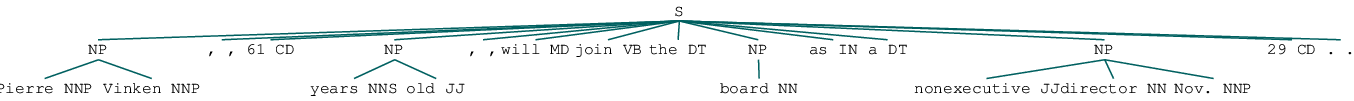

In [217]:
from IPython.display import display
tree = parser.parse(nltk.corpus.treebank.tagged_sents()[0])
tree
# see any chance that i can undertand ...

In [222]:
# The Brown University Standard Corpus of Present-Day American English (or just Brown Corpus)
nltk.download('brown')

[nltk_data] Downloading package brown to /Users/mike/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [225]:
nt = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [228]:
nt.similar('caused')

made in had done given found told left followed received with used
taken led turned said been accepted seen held


In [231]:
nt.similar('triggered')
# no very helpful... word vector maybe ??

done said had been charged it them combined experienced seen protected
found appointed filed lived since made ready paid provided


## Part 2: multiple (combined) causes

e.g. 
What Causes Dizziness and Shortness of Breath? 
https://www.healthline.com/symptom/dizziness/shortness-of-breath

has a list of 20 similar sympton down below


The problem seems easier than I think, to be precise, the steps are:

    1. On the page before click 'read more', we loop `<ul class="css-htkw05">` in search of similar 'symptoms' terms.

        e.g. anxiety/dizziness/fainting/fast-heart-rate/shortness-of-breath will be all there.
    
    2. combile symptoms 
    
        e.g. https://www.healthline.com/symptom/dizziness/fainting for dizziness and fainting.
    
    3. For each combination we need to chose n combinations.
       Where n in [2,3,4....max]. Up to max number of similar symptoms. 
    
    4. The issue is `healthline` website sometime won't have nice return. So prevent we digging further.
    
    5. Total number of page to visit = C(2,12) + C(3,12) + C(4,12) + C(5,12) ... C(11,12)
    
    6. Totaling: 4095 visit. Due to my local network being not fast and after move to coffe shop. Time become less. I won't going further down the track. But constructing url and parse front page list follows same fashion as demostrated above.


#### Wolfram Proof of 4095 page call.

http://m.wolframalpha.com/input/?i=c%2812%2Ci%29+where+i+in+%5B2..12%5D

http://m.wolframalpha.com/input/?i=c%2812%2C1%29%2Bc%2812%2C2%29%2Bc%2812%2C3%29%2Bc%2812%2C4%29%2Bc%2812%2C5%29%2Bc%2812%2C6%29%2Bc%2812%2C7%29%2Bc%2812%2C8%29%2Bc%2812%2C9%29%2Bc%2812%2C10%29%2Bc%2812%2C11%29%2Bc%2812%2C12%29&incParseTime=true

Thank you for reading !! :)